# **Classificação** 

Utilizado para descrever ou prever um atributo especial chamado class(classe)

# **Regressão** 

Semelhante a classificação, porém a classe possui dado numérico



**Naive Bayes** - algoritmo baseado na teoria das probabilidades

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [ ]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
#separações das colunas - array de valores
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [ ]:
#transformação dos atributos categóricos em numéricos
#criar um objeto para cada atributo categórico, pois será executado o processo de encoding novamente para o registro de teste
#se forem utilizados objetos diferentes, o número atribuído a cada valor poderá ser diferente, o que deixará o teste inconsistente
#One-hot encoding (indicado em casos de atributo que não possuem ordem e/ou que possuem poucas categórias)
#Label encoding (indicado para grande número de categórias e/ou que possuem uma ordem)
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:,3] = labelencoder3.fit_transform(previsores[:,3])

labelencoder4 = LabelEncoder()
previsores[:,5] = labelencoder4.fit_transform(previsores[:,5])

labelencoder5 = LabelEncoder()
previsores[:,6] = labelencoder5.fit_transform(previsores[:,6])

labelencoder6 = LabelEncoder()
previsores[:,8] = labelencoder6.fit_transform(previsores[:,8])

labelencoder7 = LabelEncoder()
previsores[:,9] = labelencoder7.fit_transform(previsores[:,9])

labelencoder8 = LabelEncoder()
previsores[:,11] = labelencoder8.fit_transform(previsores[:,11])

labelencoder9 = LabelEncoder()
previsores[:,13] = labelencoder9.fit_transform(previsores[:,13])

labelencoder10 = LabelEncoder()
previsores[:,14] = labelencoder10.fit_transform(previsores[:,14])

labelencoder11 = LabelEncoder()
previsores[:,16] = labelencoder11.fit_transform(previsores[:,16])

labelencoder12 = LabelEncoder()
previsores[:,18] = labelencoder12.fit_transform(previsores[:,18])

labelencoder13 = LabelEncoder()
previsores[:,19] = labelencoder13.fit_transform(previsores[:,19])

In [ ]:
previsores

array([[2, 6, 1, ..., 1, 1, 1],
       [1, 48, 3, ..., 1, 0, 1],
       [0, 12, 1, ..., 2, 0, 1],
       ...,
       [0, 12, 3, ..., 1, 0, 1],
       [2, 45, 3, ..., 1, 1, 1],
       [1, 45, 1, ..., 1, 0, 1]], dtype=object)

In [ ]:
#fazendo a separação dos dados de treinamento e de teste(30% teste e 70% treino)HOLD OUT
#parametro random_state=0,significa que a semente aleatória (seed) será fixa e igual a 0. 
#Isso significa que, em cada execução do algoritmo, o resultado será o mesmo, o que é útil para fins de reprodutibilidade e comparação de resultados
#previsores (variáveis independentes - X) e a classe (variável dependente - y)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3, random_state=0)

X_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [ ]:
#criação e treinamento do modelo(geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [ ]:
#fazendo previsões com os dados de teste
previsoes = naive_bayes.predict(X_teste)
previsoes[0:5] #verificando a saída

array(['bad', 'good', 'good', 'good', 'bad'], dtype='<U4')

In [ ]:
#gerando a matriz de confusão
#fazendo a comparação entre o que aconteceu e o que foi previsto 
confusao = confusion_matrix(y_teste, previsoes) 
confusao

array([[ 41,  45],
       [ 42, 172]])

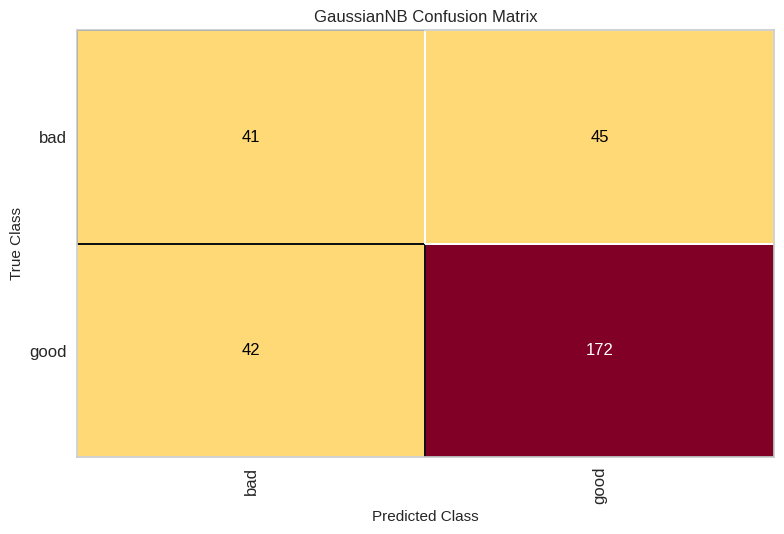

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
#visualizando a matriz de confusão
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [ ]:
#taxa de acerto e erro
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
print('taxa de acerto: ', taxa_acerto,'\n','taxa de erro: ',taxa_erro)

taxa de acerto:  0.71 
 taxa de erro:  0.29000000000000004


In [ ]:
#carregando novos dados para previsão
novo_credito = pd.read_csv('NovoCredit.csv')
novo_credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [ ]:
#transformando os atributos categóricos em númericos
#usando o mesmo objeto criado antes, para manter o padrão dos dados
#chamar apenas o método "transform", pois a adaptação aos dados(fit) já foi feita anteriormente
novo_credito = novo_credito.iloc[:,0:20].values
novo_credito[:,0] = labelencoder1.transform(novo_credito[:,0])
novo_credito[:,2] = labelencoder2.transform(novo_credito[:,2])
novo_credito[:,3] = labelencoder3.transform(novo_credito[:,3])
novo_credito[:,5] = labelencoder4.transform(novo_credito[:,5])
novo_credito[:,6] = labelencoder5.transform(novo_credito[:,6])
novo_credito[:,8] = labelencoder6.transform(novo_credito[:,8])
novo_credito[:,9] = labelencoder7.transform(novo_credito[:,9])
novo_credito[:,11] = labelencoder8.transform(novo_credito[:,11])
novo_credito[:,13] = labelencoder9.transform(novo_credito[:,13])
novo_credito[:,14] = labelencoder10.transform(novo_credito[:,14])
novo_credito[:,16] = labelencoder11.transform(novo_credito[:,16])
novo_credito[:,18] = labelencoder12.transform(novo_credito[:,18])
novo_credito[:,19] = labelencoder13.transform(novo_credito[:,19])

In [ ]:
#fazendo a previsão da class
naive_bayes.predict(novo_credito)
#resultado: confiabilidade de 71% de que esse cliente irá pagar o crédito concedido

array(['good'], dtype='<U4')

**Árvore de Decisão** - algoritmo de partição: grau de pureza

In [ ]:
#reaproveitando o carregamento da base de dados, a conversão dos atributoscategóricos para númericos, separação dos dados em treinamento e teste
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
#criação e treinamento do modelo - árvore de decisão
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [ ]:
#exportação da árvore de decisão para o formato .dot
#abrir o arquivo com algum editor de texto
#copiar o texto gerado e colar em webgraphviz.com  para visualizar a árvore
export_graphviz(arvore, out_file = 'tree.dot')


Exemplo:

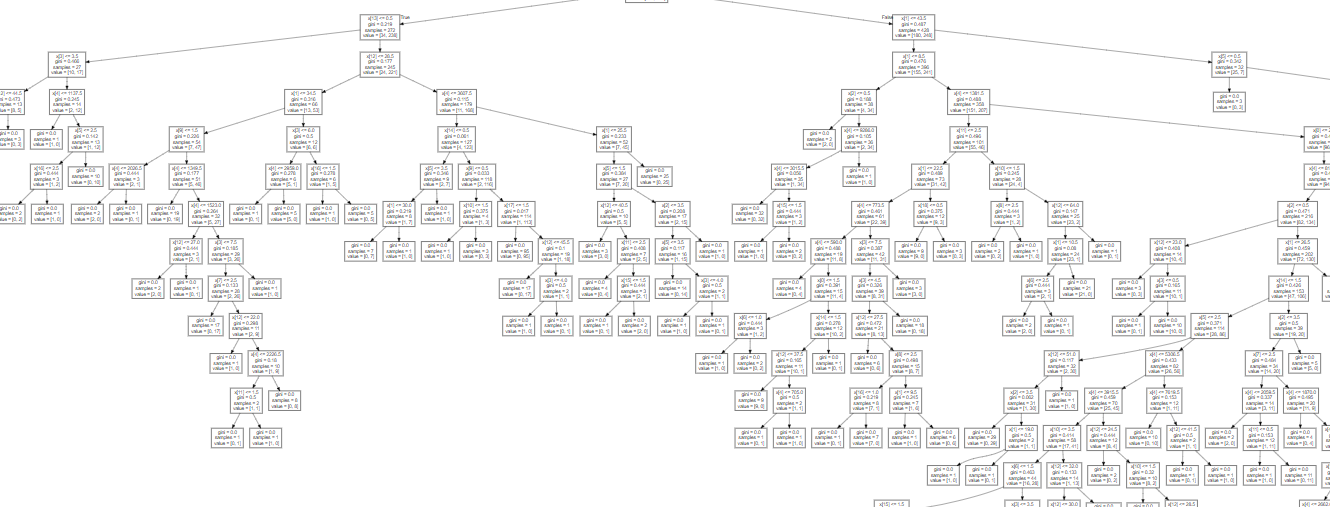

In [ ]:
#fazendo a previsao com os dados de teste
previsoes = arvore.predict(X_teste)
previsoes[0:4]

array(['bad', 'good', 'good', 'good'], dtype=object)

In [ ]:
#matriz de confusão
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 46,  40],
       [ 48, 166]])

In [ ]:
#taxa de acerto e erro
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1- taxa_acerto
print('taxa de acerto: ', taxa_acerto,'\n','taxa de erro: ',taxa_erro)


taxa de acerto:  0.7066666666666667 
 taxa de erro:  0.29333333333333333


In [ ]:
#previsao para o novo registro
previsoes = arvore.predict(novo_credito)
previsoes
#confiabilidade de 70%

array(['good'], dtype=object)

**Seleção de Atributos**

In [ ]:
#reaproveitando o carregamento da base de dados, a conversão dos atributoscategóricos para númericos, separação dos dados em treinamento e teste
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#criação do modelo(máquina de vetores de suporte) e treinamento
#ele é usado para encontrar uma fronteira de decisão que separa os diferentes tipos de dados em um conjunto de dados. 
#o SVM é especialmente útil quando os dados são complexos e não-linearmente separáveis. 
svm = SVC()
svm.fit(X_treinamento, y_treinamento)

SVC()

In [ ]:
#fazendo a previsao dos dados de teste
previsoes = svm.predict(X_teste)
previsoes[0:3]

array(['good', 'good', 'good'], dtype=object)

In [ ]:
#acurácia do modelo
taxa_acerto = accuracy_score(y_teste,previsoes)
taxa_acerto

0.7166666666666667

In [ ]:
#ExtraTreesClassifier - extrai os atributos mais importantes
forest = ExtraTreesClassifier()
forest.fit(X_treinamento, y_treinamento)
importancias = forest.feature_importances_ # calcular a importância de cada variável
importancias

array([0.10930017, 0.08107085, 0.06247192, 0.06118267, 0.08189972,
       0.04357154, 0.05545909, 0.05079631, 0.04532127, 0.02555215,
       0.05016405, 0.04794539, 0.06624441, 0.03556792, 0.03908025,
       0.03526668, 0.04513344, 0.02334185, 0.03297545, 0.00765487])

In [ ]:
#nova base de dados com seleção dos atributos mais relevantes
X_treinamento2 = X_treinamento[:,[0,1,2,12,4,3]]
X_teste2= X_teste[:,[0,1,2,12,4,3]]

In [ ]:
#novo modelo com a base de dados reduzida, treinamento, obtenção das previsões e taxa de acerto
svm2 = SVC()
svm2.fit(X_treinamento2, y_treinamento)
previsoes2 = svm2.predict(X_teste2)
taxa_acerto = accuracy_score(y_teste, previsoes2)
taxa_acerto

0.7166666666666667

**Ensamble Learning com Random Forest**

Ensemble Learning é uma técnica de aprendizado de máquina que combina **vários modelos** de aprendizado de máquina para melhorar o desempenho preditivo geral. O Random Forest é um algoritmo de aprendizado de máquina que usa ensemble learning para **construir um conjunto de árvores de decisão**.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
credito = pd.read_csv('Credit.csv')
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [ ]:
#transformação dos atributos numéricos, passando o índice de cada atributo categórico
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])

In [ ]:
#separação dos dados para treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [ ]:
#criação do modelo, treinamento
floresta = RandomForestClassifier(n_estimators = 100) #n modelos
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [ ]:
#visualização dos atributos principais
#floresta.estimators_
floresta.estimators_[1]

DecisionTreeClassifier(max_features='sqrt', random_state=523497891)

In [ ]:
#previsões e matrix de confusão
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 38,  48],
       [ 13, 201]])

In [ ]:
#taxa de acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.7966666666666666

**Aprendizado Baseado em Instância**

Algoritmo baseado em instâncias, classifica novos pontos de dados com base na distância deles para os pontos de dados de treinamento mais próximos.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from scipy import stats

In [ ]:
iris = pd.read_csv('iris.csv')
iris.shape

(150, 5)

In [ ]:
#dados extraidos do sklearn-datasets
iris= datasets.load_iris() #os dados da classe já estão em dados númericos
stats.describe(iris.data) #estatistica das variáveis independentes

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [ ]:
#separando os dados previsores(variável independente - X)  e class(variável dependente - y)
previsores = iris.data
classe = iris.target

In [ ]:
#separação dos dados de treinamento e de teste(70%/30%)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, 
                                                               classe, 
                                                               test_size = 0.3, 
                                                               random_state = 0)
len(X_treinamento)

105

In [ ]:
#criação do modelo e treinamento
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_treinamento, y_treinamento)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#previsões
previsoes = knn.predict(X_teste)
previsoes

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [ ]:
#matriz de confusao
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [ ]:
#taxa de acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.9777777777777777